In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

import wrangle

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [24]:
df = wrangle.wrangle_zillow()


/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

Text(0.5, 1.0, 'Scaled')

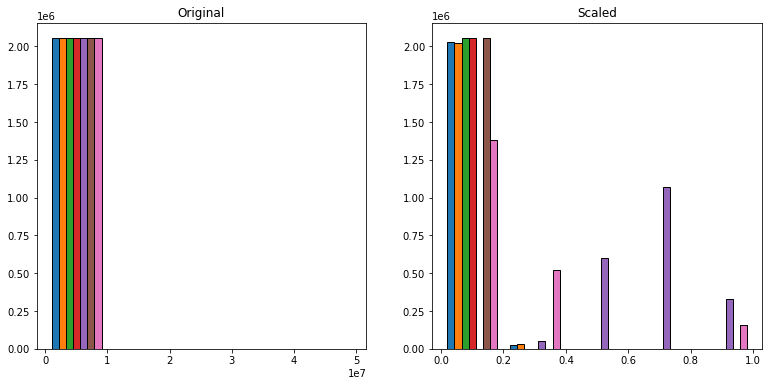

In [25]:
# MinMax Scale min 0 max 1
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(df)

df_scaled = scaler.transform(df)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df, bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_scaled, bins=5, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

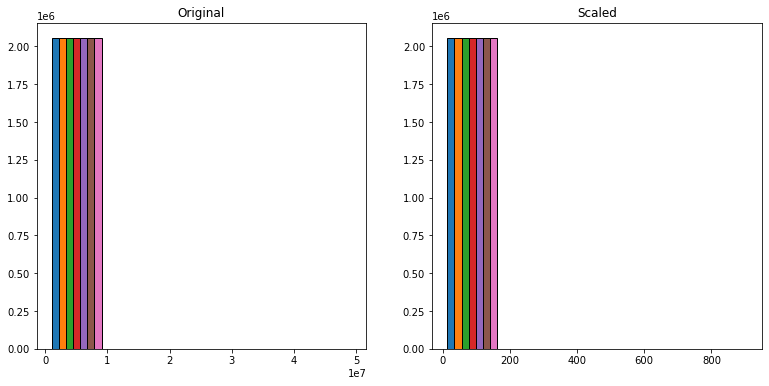

In [26]:
# Standard Scaler - mean 0, std 1
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(df)

df_scaled = scaler.transform(df)


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df, bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_scaled, bins=5, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

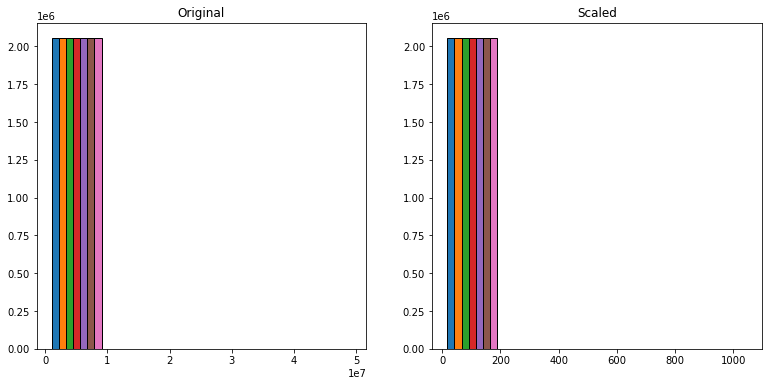

In [27]:
# Robust Scaler - uses parameters that are more robust to outliers.
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(df)

df_scaled = scaler.transform(df)


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df, bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_scaled, bins=5, ec='black')
plt.title('Scaled')

# Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [28]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [29]:
df = scaler.transform(df)

In [30]:
pd.DataFrame(scaler.inverse_transform(df)).head()

,0,1,2,3,4,5,6
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
2,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
3,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
4,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


### Yes, inverse_transform returns the original df (minus the headers)

In [46]:
df = wrangle.wrangle_zillow()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [37]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


# Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [47]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')

In [49]:
pd.DataFrame(scaler.fit_transform(df))

,0,1,2,3,4,5,6
0,0.741388,-0.135911,1.914070,-0.104411,2.043115,0.864395,-5.199338
1,-0.273089,-0.135911,0.613005,1.013722,-1.425011,1.069168,-5.199338
2,-0.273089,-5.199338,-0.686350,-0.765020,-0.584984,-0.657323,-5.199338
3,-0.273089,-0.135911,-0.555462,-0.414777,-0.584984,-0.376224,-5.199338
4,-0.273089,-0.135911,-0.741388,-0.128941,-0.497809,-0.051477,-5.199338
...,...,...,...,...,...,...,...
2054411,-0.273089,0.548158,0.305796,0.331178,2.575483,0.064404,0.823172
2054412,0.741388,1.858747,2.332259,0.390582,3.089935,1.782658,-5.199338
2054413,0.741388,0.999986,0.798769,1.574006,3.089935,1.751759,0.823172
2054414,-0.273089,0.548158,0.498756,0.396441,3.089935,0.437597,0.823172


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

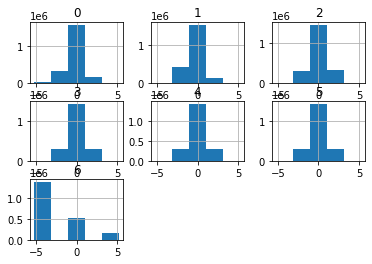

In [50]:
pd.DataFrame(scaler.fit_transform(df)).hist(bins=5)

# Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

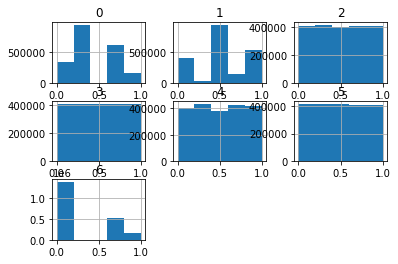

In [51]:
scaler = sklearn.preprocessing.QuantileTransformer()
pd.DataFrame(scaler.fit_transform(df)).hist(bins=5)

### The histograms are no longer evenly distributed

In [54]:
scaler = sklearn.preprocessing.QuantileTransformer()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [55]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,0.772272,0.444945,0.972367,0.459616,0.978979,0.806667,0.0
7,0.393894,0.444945,0.730731,0.846638,0.076076,0.856974,0.0
18,0.393894,0.101602,0.247247,0.224971,0.277778,0.256713,0.0
19,0.393894,0.444945,0.287788,0.341972,0.277778,0.354442,0.0
20,0.393894,0.444945,0.230230,0.448863,0.307307,0.478525,0.0
